In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

sns.set(style="white", palette="muted", color_codes=True)

%matplotlib inline

In [9]:
# non-linear transformation of size to perceived sensory input e.g. g(phi)
def sensory_transform(input):
        
    sensory_output = np.square(input)
        
    return sensory_output

In [26]:
def exact_bayes():
    
    # variabels 
    v = 2 # real size of item
    sigma_u = 2 # standard deviation of noisy input
    v_p = 3 # mean of prior
    sigma_p = 1 # variance of prior / sensory noise 
    s_range = np.arange(0.01,5,0.01) # range of sensory input
    s_step = 0.1 # step size
        
    # exact bayes (equation 4)
    numerator = (np.multiply(norm.pdf(s_range,v_p,sigma_p),# prior
                            norm.pdf(v,sensory_transform(s_range),sigma_u))) # likelihood
    normalisation = np.sum(numerator*s_step) # denominator / model evidence / p(noisy input) (equation 5)
    posterior = numerator / normalisation # posterior
    
    # plot exact bayes
    plt.figure(figsize=(7.5,2.5))
    plt.plot(s_range,norm.pdf(s_range,v_p,sigma_p))
    plt.ylabel('prior')
    sns.despine()
    
    plt.figure(figsize=(7.5,2.5))
    plt.plot(s_range,norm.pdf(v,sensory_transform(s_range),sigma_u))
    plt.ylabel('likelihood')
    sns.despine()
    

    plt.figure(figsize=(7.5,2.5))
    plt.plot(s_range,posterior)
    plt.ylabel(r' $p(v | u)$')
    sns.despine()
    
    

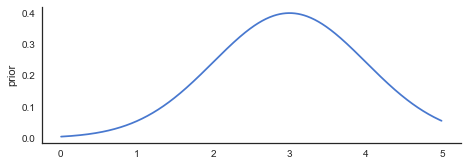

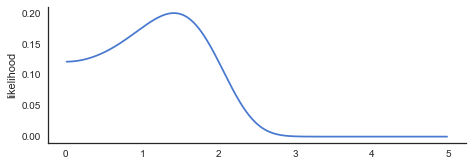

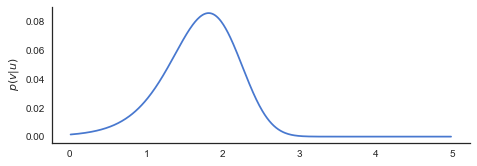

In [27]:
exact_bayes()